# Part 1 Logistic Regression on IRIS DataSet

In [1]:
try:
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report, confusion_matrix
    print("Successful imported")
except:
    print("Something went wrong")

Successful imported


In [2]:
# loading dataset

data = pd.read_csv("Iris.csv")
data.head()

,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,3.6,1.4,0.2,Iris-Setosa


In [3]:
# splittng the dataset

x = data.drop(['y'], axis = 1).to_numpy()
y= data['y'].to_numpy()
uni_class = list(set(data['y']))
modi_y = []
for i in range(len(uni_class)):
    for j in range(len(y)):
        if uni_class[i]==y[j]:
            modi_y.append(i+1)
        else:
            continue
y = modi_y


# Printing top 5 lines
x[:5],y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 [1, 1, 1, 1, 1])

In [4]:
# initializing the model object with LogisticRegression class

model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
model

LogisticRegression(random_state=0, solver='liblinear')

In [5]:
# unique class labels

model_classes = model.classes_
model_classes

array([1, 2, 3])

In [6]:
# intercept

m_intercept = model.intercept_
m_intercept

array([ 0.26421853,  1.09392467, -1.21470917])

In [7]:
# model coefficient

m_coef = model.coef_
m_coef

array([[ 0.41021713,  1.46416217, -2.26003266, -1.02103509],
       [ 0.4275087 , -1.61211605,  0.5758173 , -1.40617325],
       [-1.70751526, -1.53427768,  2.47096755,  2.55537041]])

In [8]:
m_pred_pb = model.predict_proba(x)
m_pred_pb[:5]

array([[8.78030305e-01, 1.21958900e-01, 1.07949250e-05],
       [7.97058292e-01, 2.02911413e-01, 3.02949242e-05],
       [8.51997665e-01, 1.47976480e-01, 2.58550858e-05],
       [8.23406019e-01, 1.76536159e-01, 5.78217704e-05],
       [8.96034973e-01, 1.03953836e-01, 1.11907339e-05]])

In [9]:
# prediction of y with respect to x

y_pred = model.predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [10]:
# score by sklearn

score = model.score(x, y)
score

0.96

In [11]:
# Accuracy from scratch

Accuracy = ((sum(y==y_pred)/len(y))*100).round(2)
print("Accuracy from Scratch: ",Accuracy," %")

Accuracy from Scratch:  96.0  %


In [12]:
# Confusion matrix by sklearn

con_mat_sl = confusion_matrix(y, model.predict(x))
con_mat_sl

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]], dtype=int64)

In [13]:
# Confusion Matrix from Scratch

con_mat = np.zeros((len(uni_class),len(uni_class)),dtype = 'int64')
for i in range(len(y)):
    if y[i]==1:
        if y[i]==y_pred[i]:
            con_mat[0][0] += 1
        elif y_pred[i] == 2:
            con_mat[0][1] += 1
        else:
            con_mat[0][2] += 1

    elif y[i]==2:
        if y[i]==y_pred[i]:
            con_mat[1][1] += 1
        elif y_pred[i] == 1:
            con_mat[1][0] += 1
        else:
            con_mat[1][2] += 1

    else:
        if y[i]==y_pred[i]:
            con_mat[2][2] += 1
        elif y_pred[i] == 1:
            con_mat[2][0] += 1
        else:
            con_mat[2][1] += 1

# To check correctness of Confusion matrix

flag = False
for i,j in zip(con_mat,con_mat_sl):
    for v in range(len(con_mat)):
        if i[v]==j[v]:
            flag = True
if flag==True:
    print("The matrix created from scratch is True")
    print(con_mat)

The matrix created from scratch is True
[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]


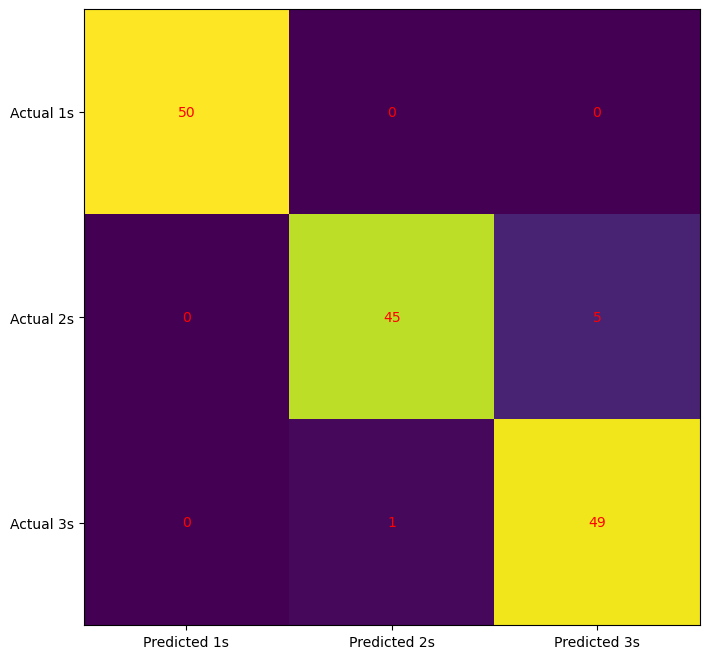

In [14]:
# Confusion Matrix Plot from Scratch with matplotlib.pyplot 

cm = con_mat
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('Predicted 1s', 'Predicted 2s','Predicted 3s'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('Actual 1s', 'Actual 2s','Actual 3s'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [15]:
# Report by Sklearn

print("Report from Sklearn")
print(classification_report(y, model.predict(x)))

Report from Sklearn
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        50
           2       0.98      0.90      0.94        50
           3       0.91      0.98      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [16]:
# Classwise Accuracy from Scratch

acc1 = (((cm[0,0]+cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2])/
         (cm[0,0]+cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]+cm[0,1]+cm[0,2]+cm[1,0]+cm[2,0]))).round(2)
acc2 = (((cm[1,1]+cm[0,0]+cm[0,2]+cm[2,0]+cm[2,2])/
         (cm[0,0]+cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]+cm[0,1]+cm[0,2]+cm[1,0]+cm[2,0]))).round(2)
acc3 = (((cm[2,2]+cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])/
         (cm[0,0]+cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]+cm[0,1]+cm[0,2]+cm[1,0]+cm[2,0]))).round(2)
print("Classwise Accuracy from Scratch")
print("Class1",acc1)
print("Class2",acc2)
print("Class3",acc3)

Classwise Accuracy from Scratch
Class1 1.0
Class2 0.96
Class3 0.96


In [17]:
# Class Wise Precision from Scratch

precision1 = ((cm[0,0]/(cm[0,0]+cm[1,0]+cm[2,0]))).round(2)
precision2 = ((cm[1,1]/(cm[0,1]+cm[1,1]+cm[2,1]))).round(2)
precision3 = ((cm[2,2]/(cm[0,2]+cm[1,2]+cm[2,2]))).round(2)

print("Class Wise Precision from Scratch")
print("Class1",precision1)
print("Class2",precision2)
print("Class3",precision3)

Class Wise Precision from Scratch
Class1 1.0
Class2 0.98
Class3 0.91


In [18]:
# Class Wise Recall from Scratch

recall1 = ((cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]))).round(2)
recall2 = ((cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]))).round(2)
recall3 = ((cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]))).round(2)

print("Class Wise Recall from Scratch")
print("Class1",recall1)
print("Class2",recall2)
print("Class3",recall3)

Class Wise Recall from Scratch
Class1 1.0
Class2 0.9
Class3 0.98


In [19]:
# Class Wise F1 Score from Scratch

f11 = (2*(precision1*recall1)/(precision1+recall1)).round(2)
f12 = (2*(precision2*recall2)/(precision2+recall2)).round(2)
f13 = (2*(precision3*recall3)/(precision3+recall3)).round(2)
print("Class Wise F1 Score from Scratch")
print("Class1",f11)
print("Class2",f12)
print("Class3",f13)

Class Wise F1 Score from Scratch
Class1 1.0
Class2 0.94
Class3 0.94


In [20]:
# Report from Scratch

print("Class wise report from scratch")
print("Class" ," Precision ","Recall "," F1 ")
print("Class1"," ",acc1," ","    ",recall1," ",f11 )
print("Class2"," ",acc2," ","   ",recall2," ",f12 )
print("Class3"," ",acc3," ","  ",recall3," ",f13 )

Class wise report from scratch
Class  Precision  Recall   F1 
Class1   1.0        1.0   1.0
Class2   0.96       0.9   0.94
Class3   0.96      0.98   0.94


# Part 2 Logisitc Regression on MNIST DataSet

In [21]:
try:
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report, confusion_matrix
    print("Successful imported")
except:
    print("Something went wrong")

Successful imported


In [22]:
# loading the data

mnist_train = pd.read_csv("mnist_train.csv")
mnist_test = pd.read_csv("mnist_test.csv")
mnist_train.head(),mnist_test.head()

(   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
 0      5       0       0       0       0       0       0       0       0   
 1      0       0       0       0       0       0       0       0       0   
 2      4       0       0       0       0       0       0       0       0   
 3      1       0       0       0       0       0       0       0       0   
 4      9       0       0       0       0       0       0       0       0   
 
    pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
 0       0  ...         0         0         0         0         0         0   
 1       0  ...         0         0         0         0         0         0   
 2       0  ...         0         0         0         0         0         0   
 3       0  ...         0         0         0         0         0         0   
 4       0  ...         0         0         0         0         0         0   
 
    pixel780  pixel781  pixel782  pixel783  
 0         0   

In [23]:
# Splitting Data

x_train = mnist_train.drop(['label'], axis = 1).to_numpy()
y_train = mnist_train['label'].to_numpy()

x_test = mnist_test.drop(['label'], axis = 1).to_numpy()
y_test = mnist_test['label'].to_numpy()

# printing top 5 rows only
print("training data ")
print("features :",x_train[:5],"labels :",y_train[:5])
print("testing data")
print("testing/validation data")
print("feature for testing :",x_test[:5],"true labels :",y_test[:5])

training data 
features : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] labels : [5 0 4 1 9]
testing data
testing/validation data
feature for testing : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] true labels : [7 2 1 0 4]


In [24]:
# Solver Types “lbfgs”, “liblinear”, “newton-cg”, “newton-cholesky”, “sag” and “saga”

model = LogisticRegression(solver='lbfgs', random_state=0)
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [25]:
# Unique classes

model_classes = model.classes_
model_classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [26]:
# intercepts

m_intercept = model.intercept_
m_intercept

array([-6.61940777e-05,  4.73003198e-05,  5.36508155e-05, -7.16795749e-05,
        9.66198928e-06,  3.51673741e-04, -2.41824974e-05,  1.13381646e-04,
       -3.43022956e-04, -7.05894060e-05])

In [27]:
# model coefficient

m_coef = model.coef_
m_coef

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
# predict proba

m_pred_pb = model.predict_proba(x_test)
m_pred_pb

array([[1.26600041e-06, 1.14589529e-13, 2.15117193e-06, ...,
        9.97526697e-01, 2.30630601e-05, 4.37542000e-04],
       [9.45918491e-05, 8.26056959e-08, 9.96010209e-01, ...,
        9.28978603e-20, 8.70378725e-05, 4.93600151e-15],
       [2.02044200e-07, 9.86296088e-01, 7.02485733e-03, ...,
        4.06337361e-04, 4.07638120e-03, 1.55343414e-04],
       ...,
       [2.35697238e-09, 4.26466279e-10, 3.03570604e-06, ...,
        6.41000680e-04, 8.03381316e-03, 1.58350066e-02],
       [3.83623842e-08, 8.84635216e-08, 3.79987268e-08, ...,
        9.08514469e-10, 6.99678442e-04, 2.55804562e-08],
       [6.37272763e-07, 1.46835901e-15, 8.05472469e-05, ...,
        3.78430365e-12, 4.00247057e-08, 8.93502430e-11]])

In [29]:
# Prediction for validate 

y_pred = model.predict(x_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [30]:
# score by sklearn

score = model.score(x_test, y_test)
print("Score from Sklearn",score)

Score from Sklearn 0.9255


In [31]:
# Accuracy from scratch

Accuracy = ((sum(y_test==y_pred)/len(y_test))*100).round(2)
print("Accuracy from Scratch: ",Accuracy," %")

Accuracy from Scratch:  92.55  %


In [32]:
# Confusion matrix by sklearn

con_mat_sl = confusion_matrix(y_test, model.predict(x_test))
print("Confusion matrix by sklearn")
con_mat_sl

Confusion matrix by sklearn


array([[ 963,    0,    0,    3,    1,    3,    4,    4,    2,    0],
       [   0, 1112,    4,    2,    0,    1,    3,    2,   11,    0],
       [   3,   10,  926,   15,    6,    4,   15,    8,   42,    3],
       [   4,    1,   21,  916,    1,   26,    3,    9,   22,    7],
       [   1,    1,    7,    3,  910,    0,    9,    7,   10,   34],
       [  11,    2,    1,   33,   11,  776,   11,    6,   35,    6],
       [   9,    3,    7,    3,    7,   16,  910,    2,    1,    0],
       [   1,    6,   24,    5,    7,    1,    0,  951,    3,   30],
       [   8,    7,    6,   23,    6,   26,   10,   10,  869,    9],
       [   9,    7,    0,   11,   25,    6,    0,   22,    7,  922]],
      dtype=int64)

In [33]:
# Confusion matrix from scratch

con_mat = np.zeros((10,10),dtype = 'int64')

for i in range(len(y_test)):
    if y_test[i]==0:
        if y_test[i]==y_pred[i]:
            con_mat[0][0] += 1
        elif y_pred[i] == 1:
            con_mat[0][1] += 1
        elif y_pred[i] == 2:
            con_mat[0][2] += 1
        elif y_pred[i] == 3:
            con_mat[0][3] += 1
        elif y_pred[i] == 4:
            con_mat[0][4] += 1
        elif y_pred[i] == 5:
            con_mat[0][5] += 1
        elif y_pred[i] == 6:
            con_mat[0][6] += 1
        elif y_pred[i]==7:
            con_mat[0][7] += 1
        elif y_pred[i]==8:
            con_mat[0][8] += 1
        elif y_pred[i]==9:
            con_mat[0][9] += 1
        else:
            continue
    elif y_test[i]==1:
        if y_test[i]==y_pred[i]:
            con_mat[1][1] += 1
        elif y_pred[i] == 0:
            con_mat[1][0] += 1
        elif y_pred[i] == 2:
            con_mat[1][2] += 1
        elif y_pred[i] == 3:
            con_mat[1][3] += 1
        elif y_pred[i] == 4:
            con_mat[1][4] += 1
        elif y_pred[i] == 5:
            con_mat[1][5] += 1
        elif y_pred[i] == 6:
            con_mat[1][6] += 1
        elif y_pred[i]==7:
            con_mat[1][7] += 1
        elif y_pred[i]==8:
            con_mat[1][8] += 1
        elif y_pred[i]==9:
            con_mat[1][9] += 1
        else:
            continue 
    elif y_test[i]==2:
        if y_test[i]==y_pred[i]:
            con_mat[2][2] += 1
        elif y_pred[i] == 1:
            con_mat[2][1] += 1
        elif y_pred[i] == 0:
            con_mat[2][0] += 1
        elif y_pred[i] == 3:
            con_mat[2][3] += 1
        elif y_pred[i] == 4:
            con_mat[2][4] += 1
        elif y_pred[i] == 5:
            con_mat[2][5] += 1
        elif y_pred[i] == 6:
            con_mat[2][6] += 1
        elif y_pred[i]==7:
            con_mat[2][7] += 1
        elif y_pred[i]==8:
            con_mat[2][8] += 1
        elif y_pred[i]==9:
            con_mat[2][9] += 1
        else:
            continue
    elif y_test[i]==3:
        if y_test[i]==y_pred[i]:
            con_mat[3][3] += 1
        elif y_pred[i] == 1:
            con_mat[3][1] += 1
        elif y_pred[i] == 2:
            con_mat[3][2] += 1
        elif y_pred[i] == 0:
            con_mat[3][0] += 1
        elif y_pred[i] == 4:
            con_mat[3][4] += 1
        elif y_pred[i] == 5:
            con_mat[3][5] += 1
        elif y_pred[i] == 6:
            con_mat[3][6] += 1
        elif y_pred[i]==7:
            con_mat[3][7] += 1
        elif y_pred[i]==8:
            con_mat[3][8] += 1
        elif y_pred[i]==9:
            con_mat[3][9] += 1
        else:
            continue 
    elif y_test[i]==4:
        if y_test[i]==y_pred[i]:
            con_mat[4][4] += 1
        elif y_pred[i] == 1:
            con_mat[4][1] += 1
        elif y_pred[i] == 2:
            con_mat[4][2] += 1
        elif y_pred[i] == 3:
            con_mat[4][3] += 1
        elif y_pred[i] == 0:
            con_mat[4][0] += 1
        elif y_pred[i] == 5:
            con_mat[4][5] += 1
        elif y_pred[i] == 6:
            con_mat[4][6] += 1
        elif y_pred[i]==7:
            con_mat[4][7] += 1
        elif y_pred[i]==8:
            con_mat[4][8] += 1
        elif y_pred[i]==9:
            con_mat[4][9] += 1
        else:
            continue
    elif y_test[i]==5:
        if y_test[i]==y_pred[i]:
            con_mat[5][5] += 1
        elif y_pred[i] == 1:
            con_mat[5][1] += 1
        elif y_pred[i] == 2:
            con_mat[5][2] += 1
        elif y_pred[i] == 3:
            con_mat[5][3] += 1
        elif y_pred[i] == 4:
            con_mat[5][4] += 1
        elif y_pred[i] == 0:
            con_mat[5][0] += 1
        elif y_pred[i] == 6:
            con_mat[5][6] += 1
        elif y_pred[i]==7:
            con_mat[5][7] += 1
        elif y_pred[i]==8:
            con_mat[5][8] += 1
        elif y_pred[i]==9:
            con_mat[5][9] += 1
        else:
            continue
            
    elif y_test[i]==6:
        if y_test[i]==y_pred[i]:
            con_mat[6][6] += 1
        elif y_pred[i] == 1:
            con_mat[6][1] += 1
        elif y_pred[i] == 2:
            con_mat[6][2] += 1
        elif y_pred[i] == 3:
            con_mat[6][3] += 1
        elif y_pred[i] == 4:
            con_mat[6][4] += 1
        elif y_pred[i] == 5:
            con_mat[6][5] += 1
        elif y_pred[i] == 0:
            con_mat[6][0] += 1
        elif y_pred[i]==7:
            con_mat[6][7] += 1
        elif y_pred[i]==8:
            con_mat[6][8] += 1
        elif y_pred[i]==9:
            con_mat[6][9] += 1
        else:
            continue
    elif y_test[i]==7:
        if y_test[i]==y_pred[i]:
            con_mat[7][7] += 1
        elif y_pred[i] == 1:
            con_mat[7][1] += 1
        elif y_pred[i] == 2:
            con_mat[7][2] += 1
        elif y_pred[i] == 3:
            con_mat[7][3] += 1
        elif y_pred[i] == 4:
            con_mat[7][4] += 1
        elif y_pred[i] == 5:
            con_mat[7][5] += 1
        elif y_pred[i] == 6:
            con_mat[7][6] += 1
        elif y_pred[i]==0:
            con_mat[7][0] += 1
        elif y_pred[i]==8:
            con_mat[7][8] += 1
        elif y_pred[i]==9:
            con_mat[7][9] += 1
        else:
            continue
    elif y_test[i]==8:
        if y_test[i]==y_pred[i]:
            con_mat[8][8] += 1
        elif y_pred[i] == 1:
            con_mat[8][1] += 1
        elif y_pred[i] == 2:
            con_mat[8][2] += 1
        elif y_pred[i] == 3:
            con_mat[8][3] += 1
        elif y_pred[i] == 4:
            con_mat[8][4] += 1
        elif y_pred[i] == 5:
            con_mat[8][5] += 1
        elif y_pred[i] == 6:
            con_mat[8][6] += 1
        elif y_pred[i]==7:
            con_mat[8][7] += 1
        elif y_pred[i]==0:
            con_mat[8][8] += 1
        elif y_pred[i]==9:
            con_mat[8][9] += 1
        else:
            continue
    else:
        if y_test[i]==y_pred[i]:
            con_mat[9][9] += 1
        elif y_pred[i] == 1:
            con_mat[9][1] += 1
        elif y_pred[i] == 2:
            con_mat[9][2] += 1
        elif y_pred[i] == 3:
            con_mat[9][3] += 1
        elif y_pred[i] == 4:
            con_mat[9][4] += 1
        elif y_pred[i] == 5:
            con_mat[9][5] += 1
        elif y_pred[i] == 6:
            con_mat[9][6] += 1
        elif y_pred[i]==7:
            con_mat[9][7] += 1
        elif y_pred[i]==8:
            con_mat[9][8] += 1
        elif y_pred[i]==0:
            con_mat[9][0] += 1
        else:
            continue 


            
print("Confusion matrix from Scratch")
con_mat

Confusion matrix from Scratch


array([[ 963,    0,    0,    3,    1,    3,    4,    4,    2,    0],
       [   0, 1112,    4,    2,    0,    1,    3,    2,   11,    0],
       [   3,   10,  926,   15,    6,    4,   15,    8,   42,    3],
       [   4,    1,   21,  916,    1,   26,    3,    9,   22,    7],
       [   1,    1,    7,    3,  910,    0,    9,    7,   10,   34],
       [  11,    2,    1,   33,   11,  776,   11,    6,   35,    6],
       [   9,    3,    7,    3,    7,   16,  910,    2,    1,    0],
       [   1,    6,   24,    5,    7,    1,    0,  951,    3,   30],
       [   0,    7,    6,   23,    6,   26,   10,   10,  877,    9],
       [   9,    7,    0,   11,   25,    6,    0,   22,    7,  922]],
      dtype=int64)

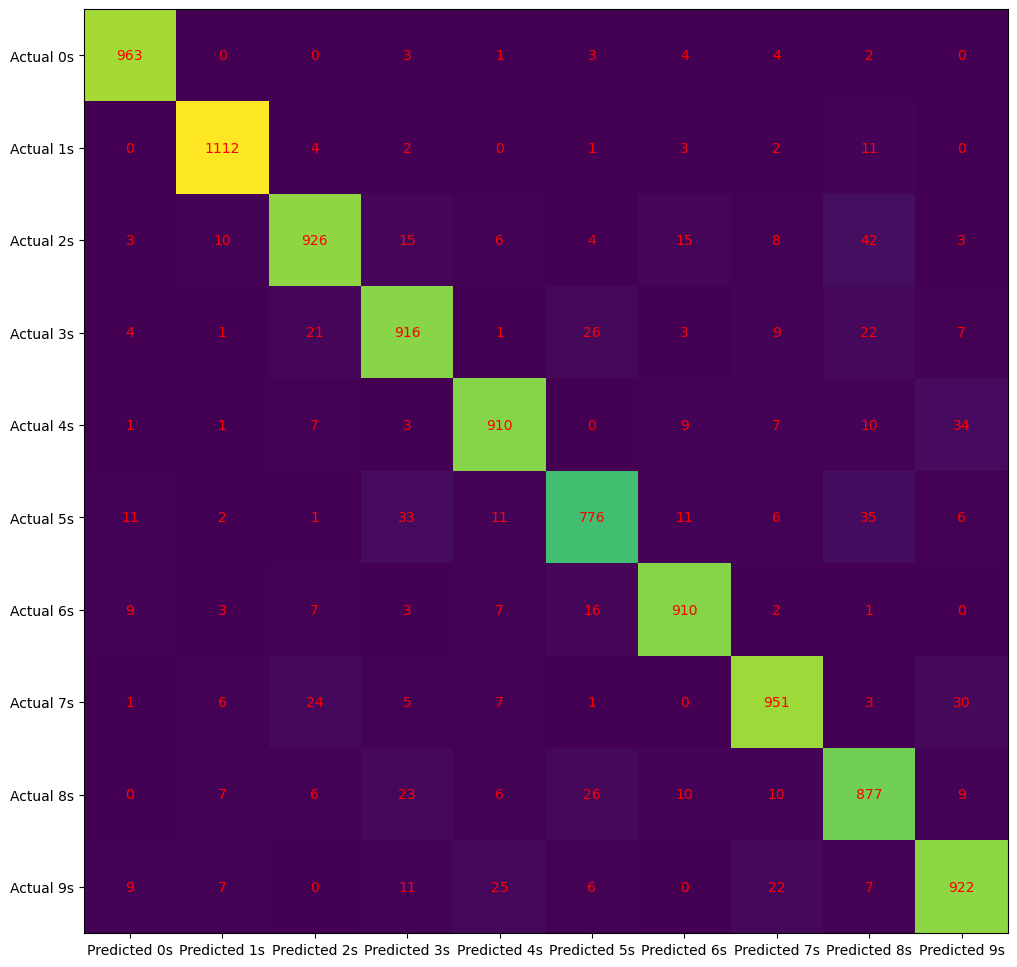

In [34]:
# Confusion matrix Plot by matplotlib.pyplot

cm = con_mat
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1,2,3,4,5,6,7,8,9), ticklabels=('Predicted 0s', 'Predicted 1s','Predicted 2s','Predicted 3s', 'Predicted 4s','Predicted 5s','Predicted 6s', 'Predicted 7s','Predicted 8s','Predicted 9s'))
ax.yaxis.set(ticks=(0,1,2,3,4,5,6,7,8,9), ticklabels=('Actual 0s', 'Actual 1s','Actual 2s','Actual 3s', 'Actual 4s','Actual 5s', 'Actual 6s','Actual 7s','Actual 8s', 'Actual 9s'))
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [35]:
# Report by Sklearn

print("Report by Sklearn")
print(classification_report(y_test, model.predict(x_test)))

Report by Sklearn
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [36]:
# Class Wise Precision from scratch

precision0 = ((cm[0,0]/(cm[0,0]+cm[1,0]+cm[2,0]+cm[3,0]+cm[4,0]+cm[5,0]+cm[6,0]+cm[7,0]+cm[8,0]+cm[9,0]))).round(2)
precision1 = ((cm[1,1]/(cm[0,1]+cm[1,1]+cm[2,1]+cm[3,1]+cm[4,1]+cm[5,1]+cm[6,1]+cm[7,1]+cm[8,1]+cm[9,1]))).round(2)
precision2 = ((cm[2,2]/(cm[0,2]+cm[1,2]+cm[2,2]+cm[3,2]+cm[4,2]+cm[5,2]+cm[6,2]+cm[7,2]+cm[8,2]+cm[9,2]))).round(2)
precision3 = ((cm[3,3]/(cm[0,3]+cm[1,3]+cm[2,3]+cm[3,3]+cm[4,3]+cm[5,3]+cm[6,3]+cm[7,3]+cm[8,3]+cm[9,3]))).round(2)
precision4 = ((cm[4,4]/(cm[0,4]+cm[1,4]+cm[2,4]+cm[3,4]+cm[4,4]+cm[5,4]+cm[6,4]+cm[7,4]+cm[8,4]+cm[9,4]))).round(2)
precision5 = ((cm[5,5]/(cm[0,5]+cm[1,5]+cm[2,5]+cm[3,5]+cm[4,5]+cm[5,5]+cm[6,5]+cm[7,5]+cm[8,5]+cm[9,5]))).round(2)
precision6 = ((cm[6,6]/(cm[0,6]+cm[1,6]+cm[2,6]+cm[3,6]+cm[4,6]+cm[5,6]+cm[6,6]+cm[7,6]+cm[8,6]+cm[9,6]))).round(2)
precision7 = ((cm[7,7]/(cm[0,7]+cm[1,7]+cm[2,7]+cm[3,7]+cm[4,7]+cm[5,7]+cm[6,7]+cm[7,7]+cm[8,7]+cm[9,7]))).round(2)
precision8 = ((cm[8,8]/(cm[0,8]+cm[1,8]+cm[2,8]+cm[3,8]+cm[4,8]+cm[5,8]+cm[6,8]+cm[7,8]+cm[8,8]+cm[9,8]))).round(2)
precision9 = ((cm[9,9]/(cm[0,9]+cm[1,9]+cm[2,9]+cm[3,9]+cm[4,9]+cm[5,9]+cm[6,9]+cm[7,9]+cm[8,9]+cm[9,9]))).round(2)

print("Class Wise Precision from scratch")
print("Class0",precision0)
print("Class1",precision1)
print("Class2",precision2)
print("Class3",precision3)
print("Class4",precision4)
print("Class5",precision5)
print("Class6",precision6)
print("Class7",precision7)
print("Class8",precision8)
print("Class9",precision9)

Class Wise Precision from scratch
Class0 0.96
Class1 0.97
Class2 0.93
Class3 0.9
Class4 0.93
Class5 0.9
Class6 0.94
Class7 0.93
Class8 0.87
Class9 0.91


In [37]:
# Classwise recall from Scratch

recall0 = ((cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3]+cm[0,4]+cm[0,5]+cm[0,6]+cm[0,7]+cm[0,8]+cm[0,9]))).round(2)
recall1 = ((cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3]+cm[1,4]+cm[1,5]+cm[1,6]+cm[1,7]+cm[1,8]+cm[1,9]))).round(2)
recall2 = ((cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3]+cm[2,4]+cm[2,5]+cm[2,6]+cm[2,7]+cm[2,8]+cm[2,9]))).round(2)
recall3 = ((cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3]+cm[3,4]+cm[3,5]+cm[3,6]+cm[3,7]+cm[3,8]+cm[3,9]))).round(2)
recall4 = ((cm[4,4]/(cm[4,0]+cm[4,1]+cm[4,2]+cm[4,3]+cm[4,4]+cm[4,5]+cm[4,6]+cm[4,7]+cm[4,8]+cm[4,9]))).round(2)
recall5 = ((cm[5,5]/(cm[5,0]+cm[5,1]+cm[5,2]+cm[5,3]+cm[5,4]+cm[5,5]+cm[5,6]+cm[5,7]+cm[5,8]+cm[5,9]))).round(2)
recall6 = ((cm[6,6]/(cm[6,0]+cm[6,1]+cm[6,2]+cm[6,3]+cm[6,4]+cm[6,5]+cm[6,6]+cm[6,7]+cm[6,8]+cm[6,9]))).round(2)
recall7 = ((cm[7,7]/(cm[7,0]+cm[7,1]+cm[7,2]+cm[7,3]+cm[7,4]+cm[7,5]+cm[7,6]+cm[7,7]+cm[7,8]+cm[7,9]))).round(2)
recall8 = ((cm[8,8]/(cm[8,0]+cm[8,1]+cm[8,2]+cm[8,3]+cm[8,4]+cm[8,5]+cm[8,6]+cm[8,7]+cm[8,8]+cm[8,9]))).round(2)
recall9 = ((cm[9,9]/(cm[9,0]+cm[9,1]+cm[9,2]+cm[9,3]+cm[9,4]+cm[9,5]+cm[9,6]+cm[9,7]+cm[9,8]+cm[9,9]))).round(2)

print("Class Wise Recall from scratch")
print("Class0",recall0)
print("Class1",recall1)
print("Class2",recall2)
print("Class3",recall3)
print("Class4",recall4)
print("Class5",recall5)
print("Class6",recall6)
print("Class7",recall7)
print("Class8",recall8)
print("Class9",recall9)

Class Wise Recall from scratch
Class0 0.98
Class1 0.98
Class2 0.9
Class3 0.91
Class4 0.93
Class5 0.87
Class6 0.95
Class7 0.93
Class8 0.9
Class9 0.91


In [38]:
# Class Wise F1 Score from scratch

f10 = (2*(precision0*recall0)/(precision0+recall0)).round(2)
f11 = (2*(precision1*recall1)/(precision1+recall1)).round(2)
f12 = (2*(precision2*recall2)/(precision2+recall2)).round(2)
f13 = (2*(precision3*recall3)/(precision3+recall3)).round(2)
f14 = (2*(precision4*recall4)/(precision4+recall4)).round(2)
f15 = (2*(precision5*recall5)/(precision5+recall5)).round(2)
f16 = (2*(precision6*recall6)/(precision6+recall6)).round(2)
f17 = (2*(precision7*recall7)/(precision7+recall7)).round(2)
f18 = (2*(precision8*recall8)/(precision8+recall8)).round(2)
f19 = (2*(precision9*recall9)/(precision9+recall9)).round(2)

print("Class Wise F1 Score from scratch")
print("Class0",f10)
print("Class1",f11)
print("Class2",f12)
print("Class3",f13)
print("Class4",f14)
print("Class5",f15)
print("Class6",f16)
print("Class7",f17)
print("Class8",f18)
print("Class9",f19)

Class Wise F1 Score from scratch
Class0 0.97
Class1 0.97
Class2 0.91
Class3 0.9
Class4 0.93
Class5 0.88
Class6 0.94
Class7 0.93
Class8 0.88
Class9 0.91


# Thank You